<a href="https://colab.research.google.com/github/ajgquional/space-debris-lifetime-classification/blob/main/space_debris_lifetime_classification_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files

data = files.upload()

Saving final_debris.csv to final_debris (1).csv


In [ ]:
data = pd.read_csv('final_debris.csv')
data

,OBJECT_NAME,NORAD_CAT_ID,INCLINATION,ECCENTRICITY,RAAN,ARGUMENT_OF_PERIGEE,MEAN_ANOMALY,MEAN_MOTION,DRAG,LAUNCH_DATE,DECAY_DATE,ACTUAL_LIFETIME,LIFETIME_CLASS
0,JUNO II R/B,23,50.267399,0.001834,226.973404,32.571201,327.563812,16.135613,0.003006,1959-10-13,1989-07-16,30,2
1,THOR ABLE R/B,28,48.342602,0.000363,203.336899,333.182892,26.922001,16.401144,0.001474,1960-04-01,1991-07-03,31,2
2,THOR ABLESTAR R/B,30,51.250000,0.000000,356.489197,331.947296,28.052601,16.293583,0.000000,1960-04-13,1961-08-18,1,0
3,SPUTNIK 4 DEB,37,64.889900,0.019840,343.241089,333.420105,27.084000,15.498003,0.000000,1960-05-15,1961-06-30,1,0
4,JUNO II R/B,62,49.885201,0.000462,300.265198,342.185089,17.966299,16.411893,0.001403,1960-11-03,1985-10-27,25,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15195,CZ-7A R/B,58205,16.580099,0.083127,217.119293,313.909698,175.890594,14.639418,0.002594,2023-11-03,2024-01-14,1,0
15196,CZ-2F DEB,58575,49.753399,0.002256,83.155800,346.752685,13.287000,16.208685,0.005305,2023-12-14,2024-01-19,1,0
15197,CZ-2F DEB,58576,50.315899,0.003953,149.068497,297.012695,62.683498,16.090190,0.005161,2023-12-14,2024-01-07,1,0
15198,CZ-2F DEB,58581,50.253101,0.005231,188.243607,256.066101,103.450798,15.988498,0.005506,2023-12-14,2024-01-01,1,0


In [ ]:
selected_columns = ['OBJECT_NAME', 'INCLINATION', 'RAAN', 'ECCENTRICITY', 'ARGUMENT_OF_PERIGEE', 'MEAN_ANOMALY', 'MEAN_MOTION', 'DRAG', 'LIFETIME_CLASS']

debris = data[selected_columns]

In [ ]:
debris

,OBJECT_NAME,INCLINATION,RAAN,ECCENTRICITY,ARGUMENT_OF_PERIGEE,MEAN_ANOMALY,MEAN_MOTION,DRAG,LIFETIME_CLASS
0,JUNO II R/B,50.267399,226.973404,0.001834,32.571201,327.563812,16.135613,0.003006,2
1,THOR ABLE R/B,48.342602,203.336899,0.000363,333.182892,26.922001,16.401144,0.001474,2
2,THOR ABLESTAR R/B,51.250000,356.489197,0.000000,331.947296,28.052601,16.293583,0.000000,0
3,SPUTNIK 4 DEB,64.889900,343.241089,0.019840,333.420105,27.084000,15.498003,0.000000,0
4,JUNO II R/B,49.885201,300.265198,0.000462,342.185089,17.966299,16.411893,0.001403,2
...,...,...,...,...,...,...,...,...,...
15195,CZ-7A R/B,16.580099,217.119293,0.083127,313.909698,175.890594,14.639418,0.002594,0
15196,CZ-2F DEB,49.753399,83.155800,0.002256,346.752685,13.287000,16.208685,0.005305,0
15197,CZ-2F DEB,50.315899,149.068497,0.003953,297.012695,62.683498,16.090190,0.005161,0
15198,CZ-2F DEB,50.253101,188.243607,0.005231,256.066101,103.450798,15.988498,0.005506,0


In [ ]:
debris.describe()

,INCLINATION,RAAN,ECCENTRICITY,ARGUMENT_OF_PERIGEE,MEAN_ANOMALY,MEAN_MOTION,DRAG,LIFETIME_CLASS
count,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000
mean,74.743477,178.177950,0.014486,203.739029,156.882665,15.591032,0.038310,0.989803
std,21.290307,105.884317,0.068751,97.993573,98.381530,1.518888,0.180361,0.809324
min,0.014000,0.005600,0.000000,0.000000,0.058300,0.298106,-0.504960,0.000000
25%,64.862450,83.994022,0.001312,129.815125,73.738276,15.515929,0.001329,0.000000
50%,81.190147,178.163200,0.002320,218.634445,143.088547,15.898451,0.005821,1.000000
75%,97.474998,269.586960,0.005209,286.179123,231.500099,16.171861,0.020083,2.000000
max,144.530197,359.944214,0.900278,359.999908,359.999908,16.589265,5.433300,2.000000


In [ ]:
lifetime_class_counts = debris['LIFETIME_CLASS'].value_counts()

print(lifetime_class_counts)

1    5243
0    5056
2    4901
Name: LIFETIME_CLASS, dtype: int64


<Axes: >

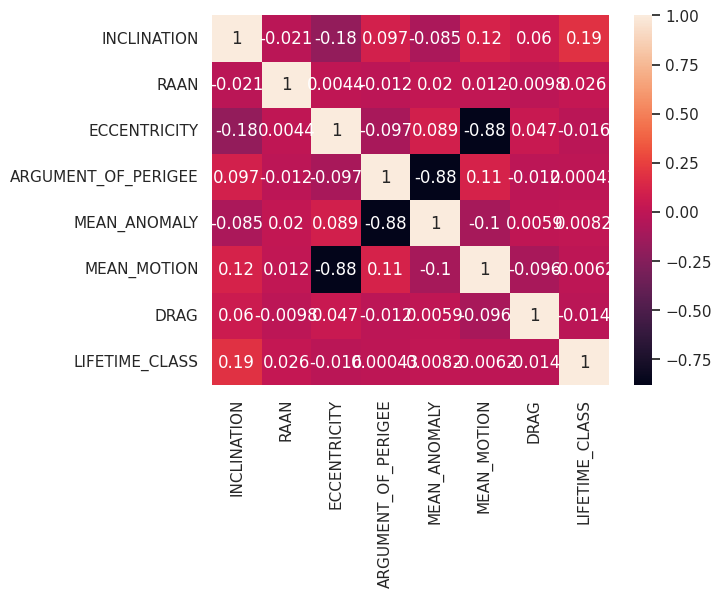

In [ ]:
import seaborn as sns
sns.set()

data= debris[['INCLINATION', 'RAAN', 'ECCENTRICITY', 'ARGUMENT_OF_PERIGEE', 'MEAN_ANOMALY', 'MEAN_MOTION', 'DRAG', 'LIFETIME_CLASS']]
sns.heatmap(data.corr(),annot=True)

In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable=['LIFETIME_CLASS']
Predictors=['INCLINATION', 'RAAN', 'ECCENTRICITY', 'ARGUMENT_OF_PERIGEE',
            'MEAN_ANOMALY', 'MEAN_MOTION', 'DRAG']

X=debris[Predictors].values
y=debris[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(12160, 7)
(12160, 1)
(3040, 7)
(3040, 1)


Epoch 1/100
608/608 [==============================] - 4s 4ms/step - loss: 1.0667 - accuracy: 0.4381 - val_loss: 1.0439 - val_accuracy: 0.4831
Epoch 2/100
608/608 [==============================] - 1s 2ms/step - loss: 1.0198 - accuracy: 0.5199 - val_loss: 1.0136 - val_accuracy: 0.5374
Epoch 3/100
608/608 [==============================] - 2s 3ms/step - loss: 0.9877 - accuracy: 0.5398 - val_loss: 0.9908 - val_accuracy: 0.5280
Epoch 4/100
608/608 [==============================] - 1s 2ms/step - loss: 0.9713 - accuracy: 0.5425 - val_loss: 0.9804 - val_accuracy: 0.5329
Epoch 5/100
608/608 [==============================] - 1s 2ms/step - loss: 0.9629 - accuracy: 0.5492 - val_loss: 0.9774 - val_accuracy: 0.5280
Epoch 6/100
608/608 [==============================] - 2s 3ms/step - loss: 0.9575 - accuracy: 0.5512 - val_loss: 0.9700 - val_accuracy: 0.5469
Epoch 7/100
608/608 [==============================] - 2s 3ms/step - loss: 0.9537 - accuracy: 0.5554 - val_loss: 0.9650 - val_accuracy: 0.5432

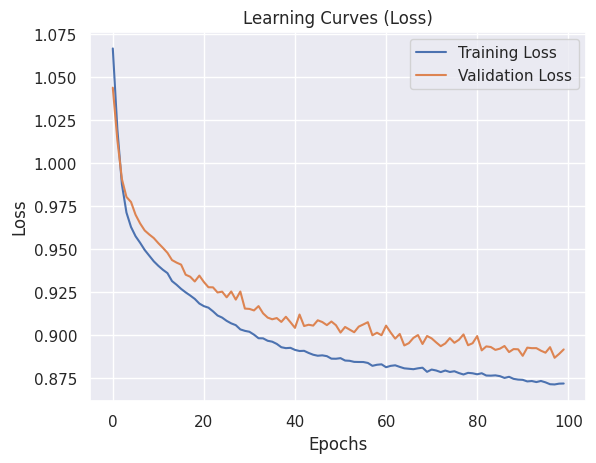

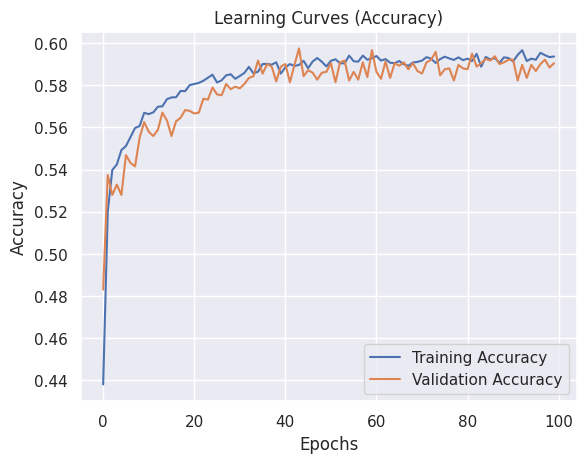

95/95 [==============================] - 0s 2ms/step


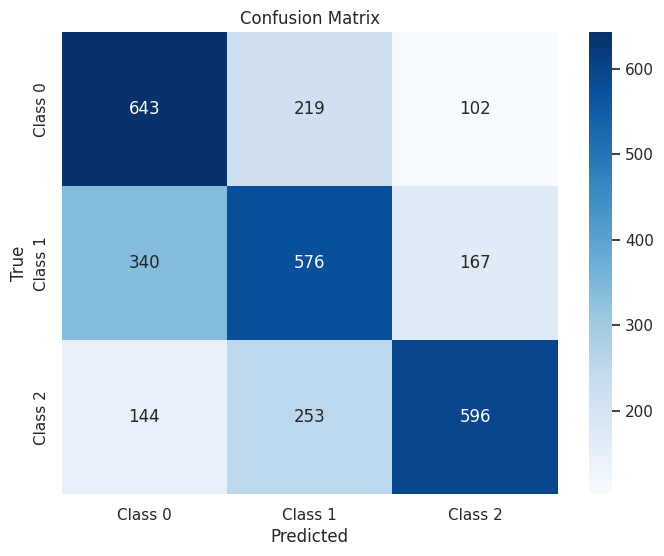

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.57      0.67      0.62       964
     Class 1       0.55      0.53      0.54      1083
     Class 2       0.69      0.60      0.64       993

    accuracy                           0.60      3040
   macro avg       0.60      0.60      0.60      3040
weighted avg       0.60      0.60      0.60      3040



In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming y_train and y_test are categorical (one-hot encoded), if not, convert them
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

classifier = Sequential()
classifier.add(Dense(units=10, input_dim=7, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(units=10, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(units=3, kernel_initializer='uniform', activation='softmax'))
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

ANN_Model = classifier.fit(X_train, y_train_categorical, validation_split=0.2,
                            batch_size=16, epochs=100, verbose=1, callbacks=[early_stopping])

# Plot learning curves (Loss)
plt.plot(ANN_Model.history['loss'], label='Training Loss')
plt.plot(ANN_Model.history['val_loss'], label='Validation Loss')
plt.title('Learning Curves (Loss)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot learning curves (Accuracy)
plt.plot(ANN_Model.history['accuracy'], label='Training Accuracy')
plt.plot(ANN_Model.history['val_accuracy'], label='Validation Accuracy')
plt.title('Learning Curves (Accuracy)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test set
y_pred = np.argmax(classifier.predict(X_test), axis=1)
y_test_argmax = np.argmax(y_test_categorical, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test_argmax, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Performance
class_report = classification_report(y_test_argmax, y_pred, target_names=['Class 0', 'Class 1', 'Class 2'])
print("Classification Report:\n", class_report)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [05:29:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_classes" } are not used.

  warnings.warn(smsg, UserWarning)


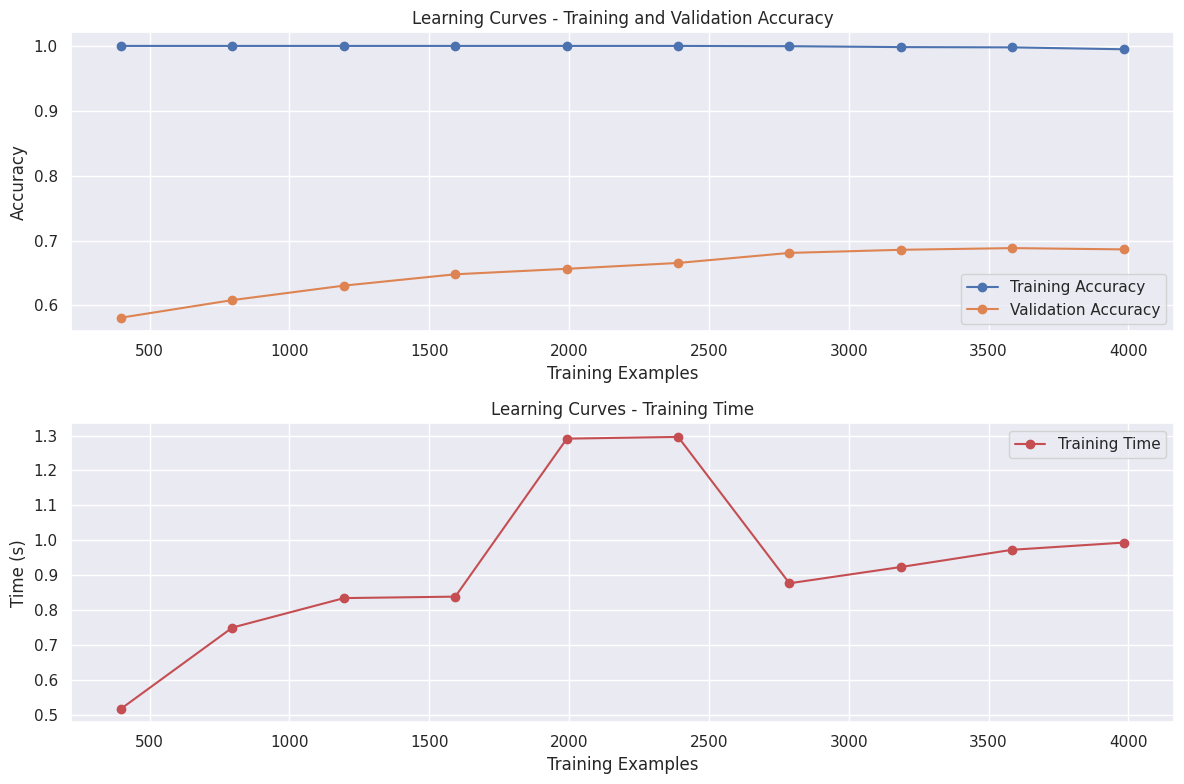

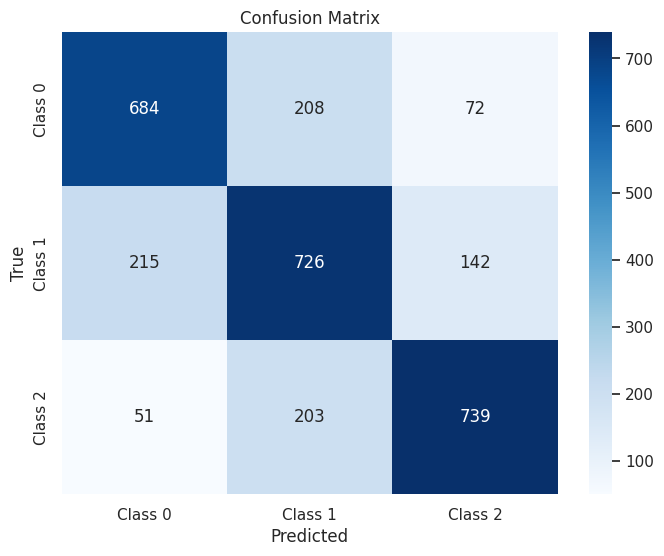

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.72      0.71      0.71       964
     Class 1       0.64      0.67      0.65      1083
     Class 2       0.78      0.74      0.76       993

    accuracy                           0.71      3040
   macro avg       0.71      0.71      0.71      3040
weighted avg       0.71      0.71      0.71      3040



In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

xgb_model = XGBClassifier(objective='multi:softmax', num_classes=3, random_state=42)
xgb_model.fit(X_train, y_train)

train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
    xgb_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), return_times=True
)

# Plot learning curves
plt.figure(figsize=(12, 8))

# Plot training & validation accuracy values
plt.subplot(2, 1, 1)
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Accuracy', marker='o')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Accuracy', marker='o')
plt.title('Learning Curves - Training and Validation Accuracy')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.legend()

# Predictions on the test set
y_pred = xgb_model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Performance
class_report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1', 'Class 2'])
print("Classification Report:\n", class_report)
